**EXTRACT CHAT, PREPROCESS CONVERT TO A FORM SUITABLE FOR ANALYSIS USING PANDAS DATAFRAME**

In [1]:
import re
import pandas as pd

In [2]:
f=open('WhatsApp Chat with MUST Research Club.txt','r',encoding='utf8')

In [3]:
data=f.read()

In [4]:
print(data)

7/25/23, 21:01 - +91 92069 50796: Has anyone here raised multiple PR requests to the same repository here ..??
7/25/23, 21:01 - +91 99168 81424: You can't from the same branch, you have to use different branch to do so
7/25/23, 21:02 - +91 92069 50796: Okies
7/26/23, 13:54 - Joy Mustafi: IMG-20230726-WA0015.jpg (file attached)
7/26/23, 13:55 - Joy Mustafi: Dear MUSTans,

We are extremely happy to share that we got our own *MUST Research* office space in T Hub 2.0, Hyderabad. This is an initiative by Ministry of Information Technology, Government of Telangana, and currently is “World’s Largest Innovation Hub”! Right now going with flexible seating arrangements like we love, and we will gradually expand our space over time there, as well as across the nation with the new leaders, new colors and new life of MUST 2.0. 

Thanks,
Regards,
Joy <This message was edited>
7/26/23, 13:55 - Joy Mustafi: IMG-20230726-WA0016.jpg (file attached)
7/26/23, 13:59 - Joy Mustafi: N.B. colored photo becaus

In [5]:
print(type(data))

<class 'str'>


In [6]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [7]:
messages=re.split(pattern,data)[1:]
messages

['+91 92069 50796: Has anyone here raised multiple PR requests to the same repository here ..??\n',
 "+91 99168 81424: You can't from the same branch, you have to use different branch to do so\n",
 '+91 92069 50796: Okies\n',
 'Joy Mustafi: IMG-20230726-WA0015.jpg (file attached)\n',
 'Joy Mustafi: Dear MUSTans,\n\nWe are extremely happy to share that we got our own *MUST Research* office space in T Hub 2.0, Hyderabad. This is an initiative by Ministry of Information Technology, Government of Telangana, and currently is “World’s Largest Innovation Hub”! Right now going with flexible seating arrangements like we love, and we will gradually expand our space over time there, as well as across the nation with the new leaders, new colors and new life of MUST 2.0. \n\nThanks,\nRegards,\nJoy <This message was edited>\n',
 'Joy Mustafi: IMG-20230726-WA0016.jpg (file attached)\n',
 'Joy Mustafi: N.B. colored photo because of New Theme (not yet finalized though) 🖤\U0001fa76🤍\U0001fa75\n',
 '+91 

In [8]:
dates=re.findall(pattern,data)
dates

['7/25/23, 21:01 - ',
 '7/25/23, 21:01 - ',
 '7/25/23, 21:02 - ',
 '7/26/23, 13:54 - ',
 '7/26/23, 13:55 - ',
 '7/26/23, 13:55 - ',
 '7/26/23, 13:59 - ',
 '7/26/23, 14:13 - ',
 '7/26/23, 14:23 - ',
 '7/26/23, 15:35 - ',
 '7/26/23, 15:45 - ',
 '7/26/23, 15:46 - ',
 '7/26/23, 15:49 - ',
 '7/26/23, 16:02 - ',
 '7/26/23, 16:08 - ',
 '7/26/23, 17:04 - ',
 '7/26/23, 17:06 - ',
 '7/26/23, 17:48 - ',
 '7/26/23, 17:52 - ',
 '7/26/23, 18:04 - ',
 '7/26/23, 18:09 - ',
 '7/26/23, 18:10 - ',
 '7/26/23, 18:10 - ',
 '7/26/23, 19:03 - ',
 '7/27/23, 15:11 - ',
 '7/27/23, 15:11 - ',
 '7/27/23, 15:18 - ',
 '7/27/23, 16:38 - ',
 '7/27/23, 16:54 - ',
 '7/27/23, 17:01 - ',
 '7/27/23, 17:02 - ',
 '7/27/23, 17:17 - ',
 '7/27/23, 18:04 - ',
 '7/28/23, 07:32 - ',
 '7/28/23, 07:32 - ',
 '7/28/23, 16:08 - ',
 '7/28/23, 20:13 - ',
 '7/28/23, 21:11 - ',
 '7/28/23, 21:13 - ',
 '7/28/23, 21:16 - ',
 '7/28/23, 21:20 - ',
 '7/28/23, 21:21 - ',
 '7/29/23, 11:25 - ',
 '7/29/23, 11:27 - ',
 '7/29/23, 11:31 - ',
 '7/29/23,

In [9]:

df = pd.DataFrame({'user_message': messages, 'message_date': dates})

# Convert message_date to datetime type
df['message_date'] = pd.to_datetime(df['message_date'], format='%m/%d/%y, %H:%M - ')

# Rename the 'message_date' column to 'date'
df.rename(columns={'message_date': 'date'}, inplace=True)

# Display the first few rows of the DataFrame
df.head()


,user_message,date
0,+91 92069 50796: Has anyone here raised multip...,2023-07-25 21:01:00
1,+91 99168 81424: You can't from the same branc...,2023-07-25 21:01:00
2,+91 92069 50796: Okies\n,2023-07-25 21:02:00
3,Joy Mustafi: IMG-20230726-WA0015.jpg (file att...,2023-07-26 13:54:00
4,"Joy Mustafi: Dear MUSTans,\n\nWe are extremely...",2023-07-26 13:55:00


In [10]:
df.shape

(152, 2)

1)user_message is split into parts using the regular expression '([\w\W]+?):\s'. This expression captures everything up to the first colon (which is assumed to be the username) and any following whitespace characters. The split parts are stored in the entry list.

2)If entry[1:] is not empty, it means that a username was successfully captured, so you append entry[1] (the username) and entry[2] (the message) to the corresponding lists.

3)If entry[1:] is empty, it means that there was no username (likely a group notification), so you append 'group_notification' and entry[0] (the message) to the lists.

In [11]:
#seperate users and messages
users=[]
messages=[]
for message in df['user_message']:
    entry=re.split('([\w\W]+?):\s',message)
    if entry[1:]: #username
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

df.head()
        

,date,user,message
0,2023-07-25 21:01:00,+91 92069 50796,Has anyone here raised multiple PR requests to...
1,2023-07-25 21:01:00,+91 99168 81424,"You can't from the same branch, you have to us..."
2,2023-07-25 21:02:00,+91 92069 50796,Okies\n
3,2023-07-26 13:54:00,Joy Mustafi,IMG-20230726-WA0015.jpg (file attached)\n
4,2023-07-26 13:55:00,Joy Mustafi,"Dear MUSTans,\n\nWe are extremely happy to sha..."


In [12]:
df['year']=df['date'].dt.year

In [13]:
df.head()

,date,user,message,year
0,2023-07-25 21:01:00,+91 92069 50796,Has anyone here raised multiple PR requests to...,2023
1,2023-07-25 21:01:00,+91 99168 81424,"You can't from the same branch, you have to us...",2023
2,2023-07-25 21:02:00,+91 92069 50796,Okies\n,2023
3,2023-07-26 13:54:00,Joy Mustafi,IMG-20230726-WA0015.jpg (file attached)\n,2023
4,2023-07-26 13:55:00,Joy Mustafi,"Dear MUSTans,\n\nWe are extremely happy to sha...",2023


In [14]:
df['month']=df['date'].dt.month_name()

In [15]:
df['day']=df['date'].dt.day

In [16]:
df.head()

,date,user,message,year,month,day
0,2023-07-25 21:01:00,+91 92069 50796,Has anyone here raised multiple PR requests to...,2023,July,25
1,2023-07-25 21:01:00,+91 99168 81424,"You can't from the same branch, you have to us...",2023,July,25
2,2023-07-25 21:02:00,+91 92069 50796,Okies\n,2023,July,25
3,2023-07-26 13:54:00,Joy Mustafi,IMG-20230726-WA0015.jpg (file attached)\n,2023,July,26
4,2023-07-26 13:55:00,Joy Mustafi,"Dear MUSTans,\n\nWe are extremely happy to sha...",2023,July,26


In [17]:
df['hour']=df['date'].dt.hour

In [18]:
df.head()

,date,user,message,year,month,day,hour
0,2023-07-25 21:01:00,+91 92069 50796,Has anyone here raised multiple PR requests to...,2023,July,25,21
1,2023-07-25 21:01:00,+91 99168 81424,"You can't from the same branch, you have to us...",2023,July,25,21
2,2023-07-25 21:02:00,+91 92069 50796,Okies\n,2023,July,25,21
3,2023-07-26 13:54:00,Joy Mustafi,IMG-20230726-WA0015.jpg (file attached)\n,2023,July,26,13
4,2023-07-26 13:55:00,Joy Mustafi,"Dear MUSTans,\n\nWe are extremely happy to sha...",2023,July,26,13


In [19]:
df['minute']=df['date'].dt.minute

In [20]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2023-07-25 21:01:00,+91 92069 50796,Has anyone here raised multiple PR requests to...,2023,July,25,21,1
1,2023-07-25 21:01:00,+91 99168 81424,"You can't from the same branch, you have to us...",2023,July,25,21,1
2,2023-07-25 21:02:00,+91 92069 50796,Okies\n,2023,July,25,21,2
3,2023-07-26 13:54:00,Joy Mustafi,IMG-20230726-WA0015.jpg (file attached)\n,2023,July,26,13,54
4,2023-07-26 13:55:00,Joy Mustafi,"Dear MUSTans,\n\nWe are extremely happy to sha...",2023,July,26,13,55


**GET NUMBER OF WORDS**

In [21]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [22]:
len(words)

1380

**GET NUMBER OF MEDIA MESSAGES**

In [23]:
num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]

In [24]:
print(num_media_messages)

0


**GET NUMBER OF LINKS**

In [25]:
!pip install urlextract




In [26]:
from urlextract import URLExtract
extractor = URLExtract()

In [27]:
links=[]

for message in df['message']:
    links.extend(extractor.find_urls(message))

In [28]:
links

['https://securityaffairs.com/148829/cyber-crime/fraudgpt-cybercrime-generative-ai.html',
 'https://brains.must.co.in',
 'https://analyticsindiamag.com/after-wormgpt-fraudgpt-makes-it-easier-for-cybercriminals/',
 'https://sites.google.com/view/irse2023/home',
 'https://www.linkedin.com/posts/joymust_mumbai-artificialintelligence-business-activity-7092891125815922688-gN7e?utm_source=share&utm_medium=member_ios',
 'www.linkedin.com/in/mamatha-alugubelly-9b36b0124',
 'https://www.linkedin.com/feed/update/urn:li:activity:7094568805443461120',
 'https://docs.google.com/forms/d/e/1FAIpQLSeHMclfl61tE6WL_s42OA0pmNcCSwCCqNxij9hQ4CnUc5ICmQ/viewform',
 'https://www.linkedin.com/posts/must-research_artificialintelligence-research-business-activity-7094712459537649664-v3yx?utm_source=share&utm_medium=member_android',
 'https://www.livemint.com/ai/artificial-intelligence/openai-likely-to-go-bankrupt-by-the-end-of-2024-report-11691815279479.html',
 'https://www.linkedin.com/posts/must-research_artif

In [29]:
len(links)

11

**FIND BUSIEST USERS IN GROUP**

In [30]:
x=df['user'].value_counts().head()

In [31]:
import matplotlib.pyplot as plt

In [32]:
name=x.index
count=x.values

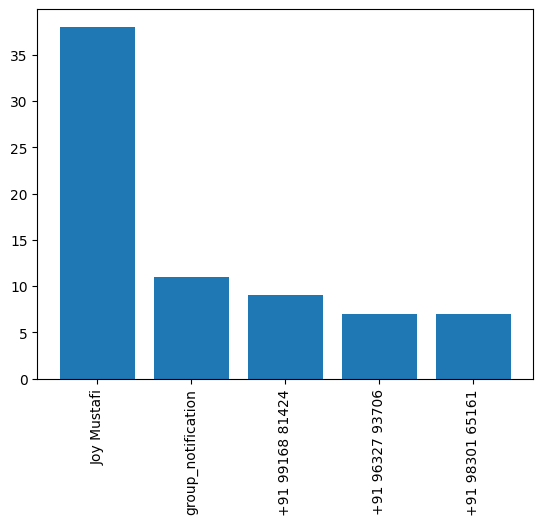

In [33]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

**TELLS HOW MUCH PERCENT USER HAS MESSAGED IN GROUP**

In [34]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index()

,index,user
0,Joy Mustafi,25.00
1,group_notification,7.24
2,+91 99168 81424,5.92
3,+91 96327 93706,4.61
4,+91 98301 65161,4.61
5,Rajarshi Pal MUST,3.95
6,+91 83749 07289,3.95
7,+91 90360 05141,3.95
8,Subhranil Sarkar MUST,3.29
9,+91 76758 47355,2.63


**PRINT TOP 25 WORDS IN GROUP/USED BY INDIVIDUAL**

1)Remove group notifications

2)Remove stopwords

In [35]:
temp=df[df['user']!='group_notification']
temp=temp[temp['message']!='<Media omitted>\n']
temp

,date,user,message,year,month,day,hour,minute
0,2023-07-25 21:01:00,+91 92069 50796,Has anyone here raised multiple PR requests to...,2023,July,25,21,1
1,2023-07-25 21:01:00,+91 99168 81424,"You can't from the same branch, you have to us...",2023,July,25,21,1
2,2023-07-25 21:02:00,+91 92069 50796,Okies\n,2023,July,25,21,2
3,2023-07-26 13:54:00,Joy Mustafi,IMG-20230726-WA0015.jpg (file attached)\n,2023,July,26,13,54
4,2023-07-26 13:55:00,Joy Mustafi,"Dear MUSTans,\n\nWe are extremely happy to sha...",2023,July,26,13,55
...,...,...,...,...,...,...,...,...
147,2023-08-12 12:51:00,+91 97397 32136,https://www.livemint.com/ai/artificial-intelli...,2023,August,12,12,51
148,2023-08-12 13:12:00,+91 76758 47355,Providing free ChatGPT service without even ad...,2023,August,12,13,12
149,2023-08-13 09:54:00,+91 98301 65161,https://www.linkedin.com/posts/must-research_a...,2023,August,13,9,54
150,2023-08-13 09:55:00,+91 98301 65161,Hi everyone. Brains Mumbai starts at 2 pm toda...,2023,August,13,9,55


In [36]:
#remove stopwords
f=open('stop_hinglish.txt','r')
stopwords=f.read()
print(stopwords)

.
..
...
?
-
--
1
2
3
4
5
6
7
8
9
0
a
aadi
aaj
aap
aapne
aata
aati
aaya
aaye
ab
abbe
abbey
abe
abhi
able
about
above
accha
according
accordingly
acha
achcha
across
actually
after
afterwards
again
against
agar
ain
aint
ain't
aisa
aise
aisi
alag
all
allow
allows
almost
alone
along
already
also
although
always
am
among
amongst
an
and
andar
another
any
anybody
anyhow
anyone
anything
anyway
anyways
anywhere
ap
apan
apart
apna
apnaa
apne
apni
appear
are
aren
arent
aren't
around
arre
as
aside
ask
asking
at
aur
avum
aya
aye
baad
baar
bad
bahut
bana
banae
banai
banao
banaya
banaye
banayi
banda
bande
bandi
bane
bani
bas
bata
batao
bc
be
became
because
become
becomes
becoming
been
before
beforehand
behind
being
below
beside
besides
best
better
between
beyond
bhai
bheetar
bhi
bhitar
bht
bilkul
bohot
bol
bola
bole
boli
bolo
bolta
bolte
bolti
both
brief
bro
btw
but
by
came
can
cannot
cant
can't
cause
causes
certain
certainly
chahiye
chaiye
chal
chalega
chhaiye
clearly
c'mon
com
come
comes
could
coul

In [37]:
words=[]

for message in temp['message']:
    for word in message.lower().split():
        if word not in stopwords:
            words.append(word)

In [38]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25))


,0,1
0,welcome,14
1,(file,13
2,attached),13
3,mumbai,13
4,joy,12
5,congratulations,12
6,data,9
7,added,7
8,brains,7
9,@916294769160,6


**EMOJI ANALYSIS**

In [39]:
!pip install emoji

In [40]:
!pip install --upgrade emoji


In [41]:
import emoji

In [43]:
    emojis = []
    for message in df['message']:
        emojis.extend([c for c in message if c in emoji.EMOJI_DATA])
    
        

In [46]:
emoji_df=pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

In [47]:
emoji_df

,0,1
0,👏,6
1,👍,5
2,😇,5
3,🎉,4
4,🎊,3
5,😀,3
6,🏻,3
7,☺,3
8,🖤,2
9,🩶,2


<BarContainer object of 5 artists>

C:\Users\anany\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\anany\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\anany\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from current font.
  func(*args, **kwargs)
C:\Users\anany\anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 127882 (\N{CONFETTI BALL}) missing from current font.
  func(*args, **kwargs)
C:\Users\anany\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\anany\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing 

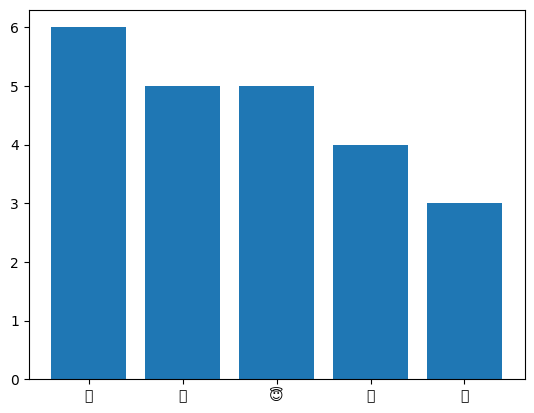

In [48]:
plt.bar(emoji_df[0].head(),emoji_df[1].head())

**MONTHLY TIMELINE**

In [51]:
df['month_num']=df['date'].dt.month

In [54]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [55]:
timeline

,year,month_num,month,message
0,2023,7,July,54
1,2023,8,August,98


In [56]:
    time = []
    for i in range(timeline.shape[0]):
        time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [57]:
time

['July-2023', 'August-2023']

In [58]:
timeline.shape[0]

2

In [59]:
timeline['time']=time

In [60]:
timeline

,year,month_num,month,message,time
0,2023,7,July,54,July-2023
1,2023,8,August,98,August-2023


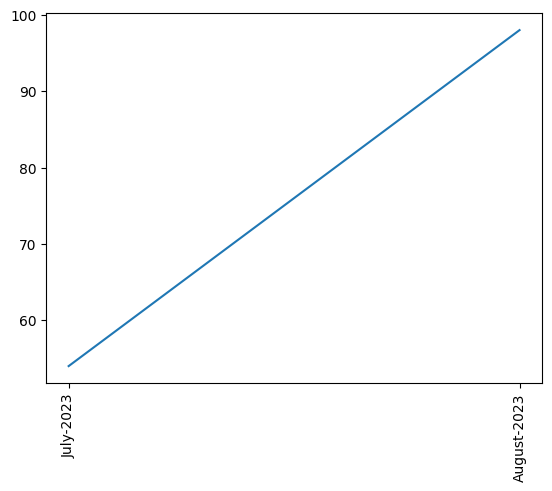

In [63]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [64]:
df['only_date']=df['date'].dt.date

In [66]:
daily_timeline=df.groupby('only_date').count()['message'].reset_index()

(array([19563., 19565., 19567., 19569., 19570., 19572., 19574., 19576.,
        19578., 19580., 19582.]),
 [Text(19563.0, 0, '2023-07-25'),
  Text(19565.0, 0, '2023-07-27'),
  Text(19567.0, 0, '2023-07-29'),
  Text(19569.0, 0, '2023-07-31'),
  Text(19570.0, 0, '2023-08-01'),
  Text(19572.0, 0, '2023-08-03'),
  Text(19574.0, 0, '2023-08-05'),
  Text(19576.0, 0, '2023-08-07'),
  Text(19578.0, 0, '2023-08-09'),
  Text(19580.0, 0, '2023-08-11'),
  Text(19582.0, 0, '2023-08-13')])

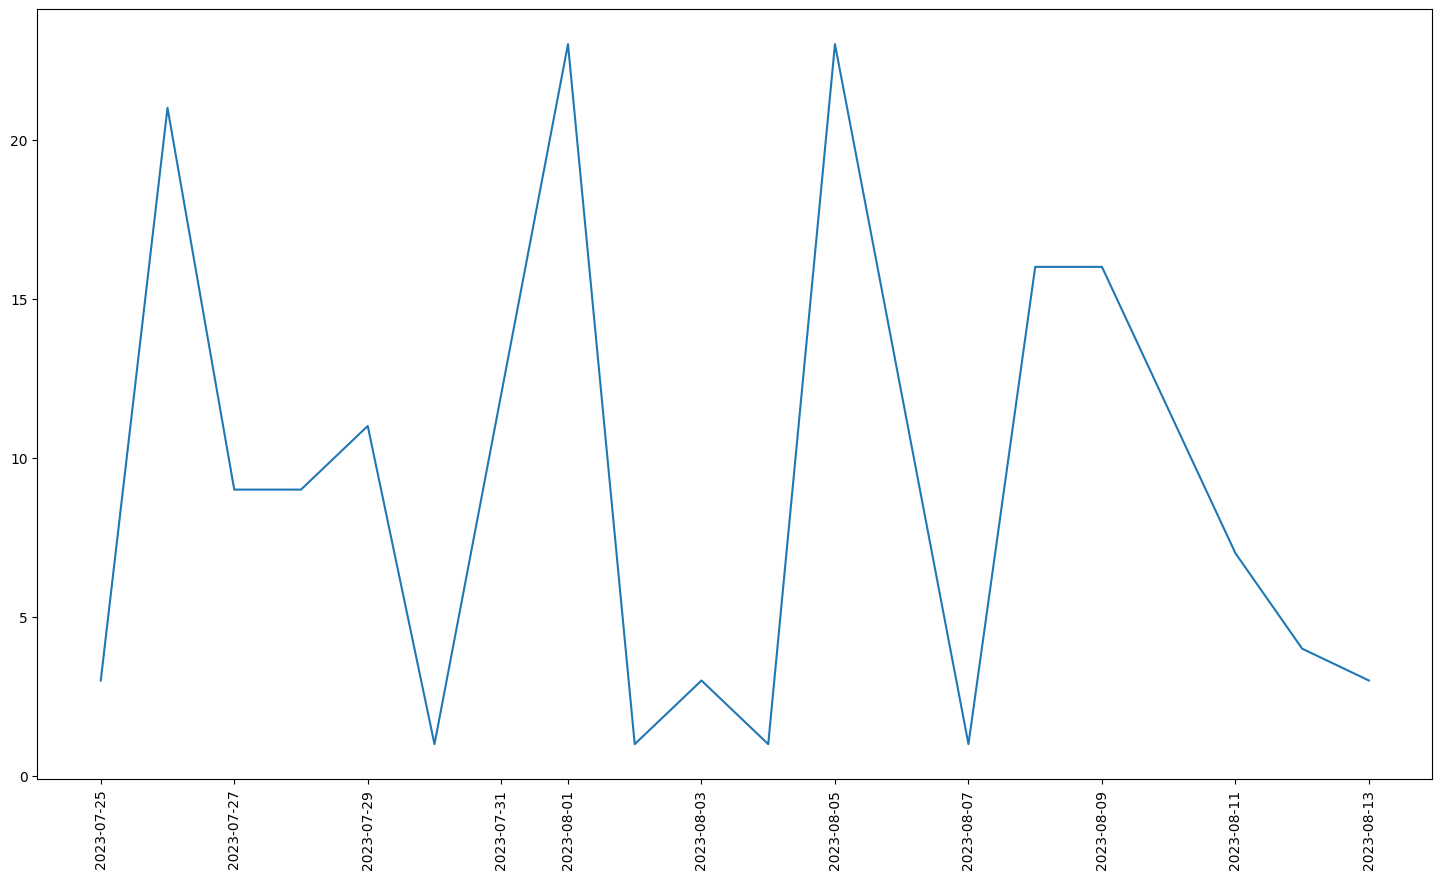

In [69]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xticks(rotation='vertical')

**FIND MOST ACTIVE GROUP MEMBERS IN WHAT DAY ETC**

In [70]:
df['day_name']=df['date'].dt.day_name()

In [71]:
df['day_name'].value_counts()

Tuesday      42
Wednesday    38
Saturday     38
Friday       17
Thursday     12
Sunday        4
Monday        1
Name: day_name, dtype: int64

In [72]:
df['month'].value_counts()

August    98
July      54
Name: month, dtype: int64

**HEATMAP TO TELL WHAT TIME OF THE DAY USERS ARE MOST ACTIVE**

In [73]:
period=[]
for hour in df[['day_name','hour']]['hour']:
    if hour==23:
        period.append(str(hour) + "-" + str('00'))
    elif hour==0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))
        

In [74]:
df['period']=period

In [75]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_name,month_num,only_date,day_name,period
69,2023-08-01 15:50:00,+91 88672 04948,Congratulations @916294769160\n,2023,August,1,15,50,8,8,2023-08-01,Tuesday,15-16
99,2023-08-05 12:40:00,+91 83749 07289,"Here, I share my linked in profile, which also...",2023,August,5,12,40,8,8,2023-08-05,Saturday,12-13
7,2023-07-26 14:13:00,+91 89816 29011,Beautiful\n,2023,July,26,14,13,7,7,2023-07-26,Wednesday,14-15
106,2023-08-08 12:23:00,Joy Mustafi,https://www.linkedin.com/feed/update/urn:li:ac...,2023,August,8,12,23,8,8,2023-08-08,Tuesday,12-13
86,2023-08-05 12:15:00,Joy Mustafi,Welcome to MUST 😇\n,2023,August,5,12,15,8,8,2023-08-05,Saturday,12-13


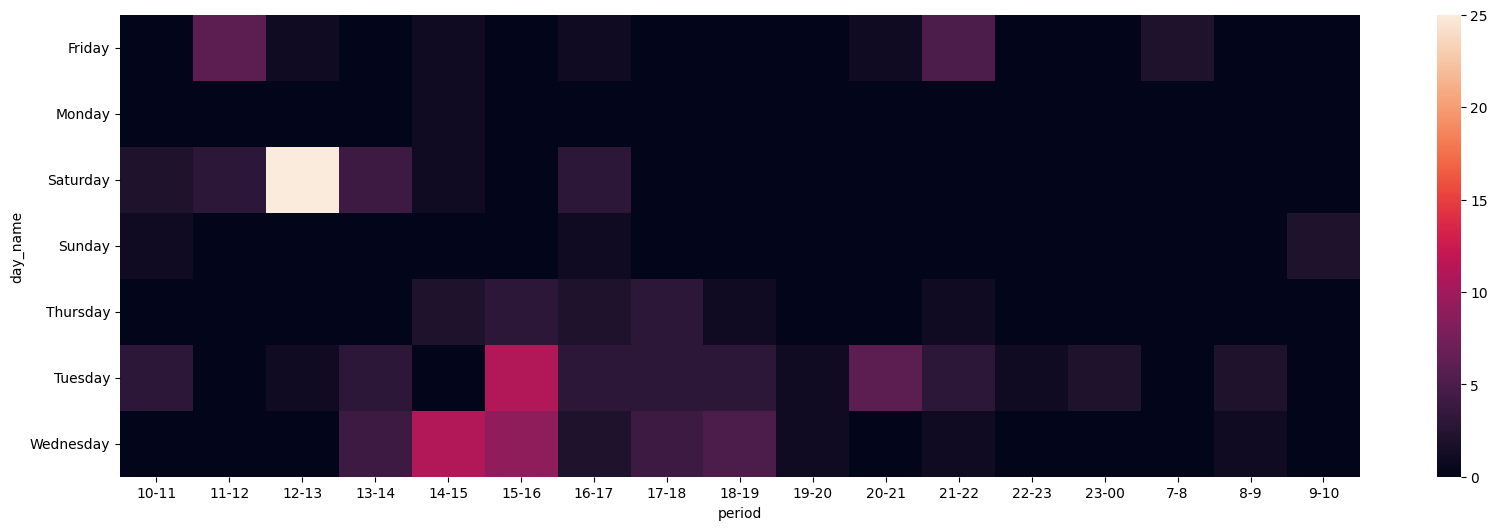

In [76]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()